In [33]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas  # noqa
from src.load_data import load_data
import pickle
import xarray as xr

import logging
logging.basicConfig(level=logging.INFO)

In [3]:
# parameters 

t1 = 360000 #28000 # start time from decode
t2 = 420000 #40000 # end time from decode
loaddata = 0 # loads pos, marks, theta, only have to load once if working across single epoch --- WILL ALSO SAVE THIS PKL
savedata = 1 # saves results as .nc file (ONLY SAVES RESULTS NOT DATA), #data as .pkl <- no, moved this to loaddata

In [4]:
#epoch_key = ('jaq', 1, 2) # animal, day, epoch
epoch_key = ('chimi', 5, 2) # animal, day, epoch

In [5]:
#%debug
if loaddata==1:
    #from dask.distributed import Client

    #client = Client(n_workers=16,
    #            threads_per_worker=2,
    #            processes=True,
    #            memory_limit='25GB')
    data = load_data(epoch_key)
    
elif loaddata==0:
    data_path = '/home/alison/Src/ac_clusterless_decoding/Processed-Data/'
    data = pickle.load(open(data_path + 'data_' + str(epoch_key[0]) + '_' + str(epoch_key[1]) + '_' + str(epoch_key[2])+ ".pkl", "rb"))

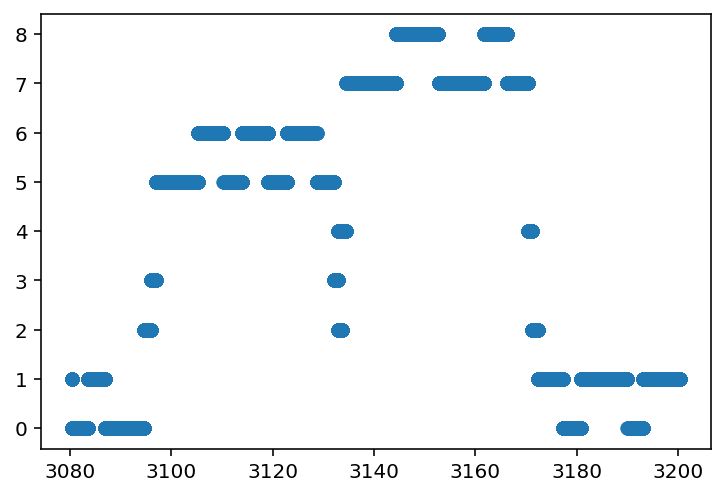

In [6]:
# plots segments over traversal

plt.scatter(data['position_info'][t1:t2].index / np.timedelta64(1, 's'), data['position_info'][t1:t2].track_segment_id) 

In [7]:
print(data.keys())

data['position_info']

dict_keys(['position_info', 'multiunits', 'theta', 'multiunit_firing_rate'])


,x_position,y_position,head_direction,speed,linear_distance,projected_x_position,projected_y_position,track_segment_id,linear_position,linear_velocity,linear_speed
time,,,,,,,,,,,
00:39:20.420276,90.334794,211.747777,2.886429,41.448349,217.824627,89.990806,211.127697,0.0,558.437792,-0.101552,0.101552
00:39:20.422276,90.337426,211.838737,2.863581,40.957849,217.866451,89.954233,211.147986,0.0,558.479616,-0.101552,0.101552
00:39:20.424276,90.340058,211.929697,2.840733,40.467349,217.908274,89.917661,211.168274,0.0,558.521439,-0.203100,0.203100
00:39:20.426276,90.342690,212.020657,2.817885,39.976849,217.950098,89.881088,211.188563,0.0,558.563262,-0.304644,0.304644
00:39:20.428276,90.345322,212.111617,2.795037,39.486349,217.991921,89.844515,211.208852,0.0,558.605086,-0.406184,0.406184
...,...,...,...,...,...,...,...,...,...,...,...
01:01:11.654276,182.175781,201.391894,-0.996263,0.578596,219.955799,175.487620,212.950759,1.0,635.172806,0.001682,0.001682
01:01:11.656276,182.175979,201.392460,-0.997717,0.563956,219.956253,175.488014,212.950986,1.0,635.173261,0.001346,0.001346
01:01:11.658276,182.176177,201.393025,-0.999172,0.549316,219.956708,175.488407,212.951214,1.0,635.173715,0.001010,0.001010


In [8]:
data['multiunits']

<xarray.DataArray (time: 655622, features: 4, tetrodes: 22)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan, 132., ...,  nan,  nan,  nan],
        [ nan,  nan, 131., ...,  nan,  nan,  nan],
        [ nan,  nan,  11., ...,  nan,  nan,  nan],
        [ nan,  nan,  72., ...,  nan,  nan,  nan]],

       [[ nan,  nan,  84., ...,  nan,  nan,  nan],
        [ nan,  nan,  47., ...,  nan,  nan,  nan],
        [ nan,  nan, -11., ...,  nan,  nan,  nan],
        [ nan,  nan,  19., ...,  nan,  nan,  nan]],

       ...,

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]])
Coordinates:
  * time      (time) timedelta64[ns] 00:39:20.420276 ... 01:01:11.662276
  * features  (features) <U13 'channel_1_max' ... 'channel_4_max'
Dimensions without coordinates: tetrodes

In [9]:
data['theta'] 

,bandpassed_lfp,instantaneous_phase,envelope_magnitude
time,,,
00:38:11.669150,0,-15707,810
00:38:11.669816,39,-15299,941
00:38:11.670483,77,-14960,1030
00:38:11.671150,116,-14665,1111
00:38:11.671816,155,-14394,1180
...,...,...,...
01:01:11.691816,366,-7709,510
01:01:11.692483,283,-9564,492
01:01:11.693149,201,-11607,503


In [10]:
data['multiunit_firing_rate']

,firing_rate
time,
00:39:20.420276,34.868707
00:39:20.422276,38.922852
00:39:20.424276,43.010800
00:39:20.426276,47.079148
00:39:20.428276,51.079156
...,...
01:01:11.654276,38.016891
01:01:11.656276,32.572362
01:01:11.658276,27.553507


In [11]:
from replay_trajectory_classification import ClusterlessDecoder

ClusterlessDecoder?

Init signature:
ClusterlessDecoder(
    place_bin_size=2.0,
    replay_speed=40,
    movement_var=0.05,
    position_range=None,
    model=<class 'replay_trajectory_classification.misc.NumbaKDE'>,
    model_kwargs={'bandwidth': array([24., 24., 24., 24.,  6.,  6.])},
    occupancy_model=None,
    occupancy_kwargs=None,
    transition_type='random_walk',
    initial_conditions_type='uniform_on_track',
    infer_track_interior=True,
)
Docstring:     
Attributes
----------
place_bin_size : float, optional
    Approximate size of the position bins.
replay_speed : int, optional
    How many times faster the replay movement is than normal movement.
movement_var : float, optional
    How far the animal is can move in one time bin during normal
    movement.
position_range : sequence, optional
    A sequence of `n_position_dims`, each an optional (lower, upper)
    tuple giving the outer bin edges for position.
    An entry of None in the sequence results in the minimum and maximum
    values 

In [12]:
decoder = ClusterlessDecoder(transition_type='random_walk', replay_speed=1, movement_var=6, place_bin_size=2.5)
#Ed has been setting movement var 6 and replay speed 1 and place bin size 2.5 for random walk

In [13]:
decoder?

Type:        ClusterlessDecoder
String form:
ClusterlessDecoder(infer_track_interior=True,
           initial_conditions_type='uniform <...> _size=2.5, position_range=None, replay_speed=1,
           transition_type='random_walk')
File:        ~/anaconda3/envs/ac_clusterless_decoding/lib/python3.6/site-packages/replay_trajectory_classification/decoder.py
Docstring:  
Attributes
----------
place_bin_size : float, optional
    Approximate size of the position bins.
replay_speed : int, optional
    How many times faster the replay movement is than normal movement.
movement_var : float, optional
    How far the animal is can move in one time bin during normal
    movement.
position_range : sequence, optional
    A sequence of `n_position_dims`, each an optional (lower, upper)
    tuple giving the outer bin edges for position.
    An entry of None in the sequence results in the minimum and maximum
    values being used for the corresponding dimension.
    The default, None, is equivalent to

In [164]:
decoder.fit(
    position=data['position_info'].linear_position,
    multiunits=data['multiunits'],
    is_training=data['position_info'].speed > 4)



INFO:replay_trajectory_classification.decoder:Fitting initial conditions...
INFO:replay_trajectory_classification.decoder:Fitting state transition...
INFO:replay_trajectory_classification.decoder:Fitting multiunits...


ClusterlessDecoder(infer_track_interior=True,
                   initial_conditions_type='uniform_on_track',
                   model=<class 'replay_trajectory_classification.misc.NumbaKDE'>,
                   model_kwargs={'bandwidth': array([24., 24., 24., 24.,  6.,  6.])},
                   movement_var=6,
                   occupancy_kwargs={'bandwidth': array([24., 24., 24., 24.,  6.,  6.])},
                   occupancy_model=<class 'replay_trajectory_classification.misc.NumbaKDE'>,
                   place_bin_size=2.5, position_range=None, replay_speed=1,
                   transition_type='random_walk')

In [171]:
is_training_description = 'run4cm'      #'all' | 'run4cm' | 'run10cm' | 'rest4cm' | 'rest10cm' | ...

In [172]:
import time

_start_time = time.time()

def tic():
    global _start_time 
    _start_time = time.time()

def toc():
    t_sec = round(time.time() - _start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print('Time passed: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

In [ ]:
tic()
results = decoder.predict(data['multiunits'].isel(time=slice(t1,t2)))
toc()

In [ ]:
results

In [ ]:
print('results_'+ str(epoch_key[0]) + '_' + str(epoch_key[1]) + '_' + str(epoch_key[2]) + '_' + str(t1) + '_' + str(t2) + 
                      '_placebin' + str(decoder.place_bin_size) + 
                      '_speed' + str(decoder.replay_speed) + 
                      '_transit' + str(decoder.transition_type) + 
                      '_encode' + is_training_description + '.nc')

In [ ]:
fpath = '/home/alison/Src/ac_clusterless_decoding/Processed-Data/'
if savedata==1:  
    results.to_netcdf(fpath + 'results_'+ str(epoch_key[0]) + '_' + str(epoch_key[1]) + '_' + str(epoch_key[2]) + '_' + str(t1) + '_' + str(t2) + 
                      '_placebin' + str(decoder.place_bin_size) + 
                      '_speed' + str(decoder.replay_speed) + 
                      '_transit' + str(decoder.transition_type) +
                      '_encode' + is_training_description + '.nc', 'w') # will override
if loaddata ==1:
    f = open(fpath + 'data_' + str(epoch_key[0]) + '_' + str(epoch_key[1]) + '_' + str(epoch_key[2]) + ".pkl","wb")
    pickle.dump(data,f)
    f.close()

In [ ]:
decoder.predict

In [14]:
data['position_info']

,x_position,y_position,head_direction,speed,linear_distance,projected_x_position,projected_y_position,track_segment_id,linear_position,linear_velocity,linear_speed
time,,,,,,,,,,,
00:39:20.420276,90.334794,211.747777,2.886429,41.448349,217.824627,89.990806,211.127697,0.0,558.437792,-0.101552,0.101552
00:39:20.422276,90.337426,211.838737,2.863581,40.957849,217.866451,89.954233,211.147986,0.0,558.479616,-0.101552,0.101552
00:39:20.424276,90.340058,211.929697,2.840733,40.467349,217.908274,89.917661,211.168274,0.0,558.521439,-0.203100,0.203100
00:39:20.426276,90.342690,212.020657,2.817885,39.976849,217.950098,89.881088,211.188563,0.0,558.563262,-0.304644,0.304644
00:39:20.428276,90.345322,212.111617,2.795037,39.486349,217.991921,89.844515,211.208852,0.0,558.605086,-0.406184,0.406184
...,...,...,...,...,...,...,...,...,...,...,...
01:01:11.654276,182.175781,201.391894,-0.996263,0.578596,219.955799,175.487620,212.950759,1.0,635.172806,0.001682,0.001682
01:01:11.656276,182.175979,201.392460,-0.997717,0.563956,219.956253,175.488014,212.950986,1.0,635.173261,0.001346,0.001346
01:01:11.658276,182.176177,201.393025,-0.999172,0.549316,219.956708,175.488407,212.951214,1.0,635.173715,0.001010,0.001010


|<bar/>| 0/? [00:00<?, ?it/s]

In [18]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm
import logging

FORMAT = '%(asctime)s %(message)s'

logging.basicConfig(level='INFO', format=FORMAT, datefmt='%d-%b-%y %H:%M:%S')

cv = KFold()
cv_clusterless_decoder_results = []

In [26]:
is_running = data["position_info"].speed > 4
is_training_description = 'run4cm' 

In [ ]:
for fold_ind, (train, test) in tqdm(enumerate(cv.split(data["position_info"].index))):

    decoder = ClusterlessDecoder(transition_type='random_walk', replay_speed=1, movement_var=6, place_bin_size=2.5)

    decoder.fit(
        position=data["position_info"].iloc[train].linear_position,
        multiunits=data["multiunits"].isel(time=train),
        is_training=is_running.iloc[train]
    )
    
    logging.info('Predicting posterior...')
    cv_clusterless_decoder_results.append(
        decoder.predict(
            data["multiunits"].isel(time=test),
            time=data["position_info"].iloc[test].index / np.timedelta64(1, "s")
        )
    )
logging.info('Done...')

INFO:replay_trajectory_classification.decoder:Fitting initial conditions...
INFO:replay_trajectory_classification.decoder:Fitting state transition...
INFO:replay_trajectory_classification.decoder:Fitting multiunits...
INFO:root:Predicting posterior...
INFO:replay_trajectory_classification.decoder:Fitting initial conditions...
INFO:replay_trajectory_classification.decoder:Fitting state transition...
INFO:replay_trajectory_classification.decoder:Fitting multiunits...
INFO:root:Predicting posterior...


In [21]:
print('done')

done


In [22]:
print('done')

done


In [23]:
cv_clusterless_decoder_results

[<xarray.Dataset>
 Dimensions:            (position: 258, time: 131125)
 Coordinates:
   * time               (time) float64 2.36e+03 2.36e+03 ... 2.623e+03 2.623e+03
   * position           (position) float64 1.25 3.749 6.247 ... 638.4 640.9 643.4
 Data variables:
     likelihood         (time, position) float64 0.8392 0.81 ... 0.1493 0.1453
     causal_posterior   (time, position) float64 0.009979 0.009633 ... 7.376e-20
     acausal_posterior  (time, position) float64 5.581e-14 ... 7.376e-20,
 <xarray.Dataset>
 Dimensions:            (position: 258, time: 131125)
 Coordinates:
   * time               (time) float64 2.623e+03 2.623e+03 ... 2.885e+03
   * position           (position) float64 1.249 3.748 6.247 ... 640.9 643.4
 Data variables:
     likelihood         (time, position) float64 0.4875 0.4667 ... 0.007166
     causal_posterior   (time, position) float64 0.01078 0.01032 ... 7.64e-103
     acausal_posterior  (time, position) float64 1.893e-15 2.66e-15 ... 7.64e-103,
 <xarray.

In [24]:
cv_clusterless_decoder_results[0]

<xarray.Dataset>
Dimensions:            (position: 258, time: 131125)
Coordinates:
  * time               (time) float64 2.36e+03 2.36e+03 ... 2.623e+03 2.623e+03
  * position           (position) float64 1.25 3.749 6.247 ... 638.4 640.9 643.4
Data variables:
    likelihood         (time, position) float64 0.8392 0.81 ... 0.1493 0.1453
    causal_posterior   (time, position) float64 0.009979 0.009633 ... 7.376e-20
    acausal_posterior  (time, position) float64 5.581e-14 ... 7.376e-20

In [37]:
cv_clusterless_decoder_results_concat = xr.concat(
    cv_clusterless_decoder_results, dim="time"
)
cv_clusterless_decoder_results_concat

<xarray.Dataset>
Dimensions:            (position: 774, time: 655622)
Coordinates:
  * position           (position) float64 1.249 1.249 1.25 ... 643.2 643.4 643.4
  * time               (time) float64 2.36e+03 2.36e+03 ... 3.672e+03 3.672e+03
Data variables:
    likelihood         (time, position) float64 nan nan 0.8392 ... nan nan
    causal_posterior   (time, position) float64 nan nan 0.009979 ... nan nan
    acausal_posterior  (time, position) float64 nan nan 5.581e-14 ... nan nan

In [44]:
results = cv_clusterless_decoder_results_concat

In [45]:
print('results_'+ str(epoch_key[0]) + '_' + str(epoch_key[1]) + '_' + str(epoch_key[2]) + '_' + str(0) + '_' + str(len(cv_clusterless_decoder_results_concat.time)) +
                      '_placebin' + str(decoder.place_bin_size) + 
                      '_speed' + str(decoder.replay_speed) + 
                      '_transit' + str(decoder.transition_type) + 
                      '_encode' + is_training_description + 
                      '_5fold' +
                      '.nc')

results_chimi_5_2_0_655622_placebin2.5_speed1_transitrandom_walk_encoderun4cm_5fold.nc


In [46]:
fpath = '/home/alison/Src/ac_clusterless_decoding/Processed-Data/'
if savedata==1:  
    results.to_netcdf(fpath + 'results_'+ str(epoch_key[0]) + '_' + str(epoch_key[1]) + '_' + str(epoch_key[2]) + '_' + str(0) + '_' + str(len(cv_clusterless_decoder_results_concat.time)) +
                      '_placebin' + str(decoder.place_bin_size) + 
                      '_speed' + str(decoder.replay_speed) + 
                      '_transit' + str(decoder.transition_type) + 
                      '_encode' + is_training_description + 
                      '_5fold' +
                      '.nc', 'w') # will override

In [47]:
results

<xarray.Dataset>
Dimensions:            (position: 774, time: 655622)
Coordinates:
  * position           (position) float64 1.249 1.249 1.25 ... 643.2 643.4 643.4
  * time               (time) float64 2.36e+03 2.36e+03 ... 3.672e+03 3.672e+03
Data variables:
    likelihood         (time, position) float64 nan nan 0.8392 ... nan nan
    causal_posterior   (time, position) float64 nan nan 0.009979 ... nan nan
    acausal_posterior  (time, position) float64 nan nan 5.581e-14 ... nan nan

In [ ]:
#THIS WAS NOT RESPECTING THE TRACK GRAPH GEOMETRY, MUST REDO, AND MUST VISUALIZE THE STATE TRANSITION!!!!!

In [79]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm
import logging

FORMAT = '%(asctime)s %(message)s'

logging.basicConfig(level='INFO', format=FORMAT, datefmt='%d-%b-%y %H:%M:%S')

cv = KFold()
cv_clusterless_decoder_results = []

from src.parameters import EDGE_ORDER, EDGE_SPACING
from src.load_data import make_track_graph

track_graph, center_well_id = make_track_graph()
is_running = data["position_info"].speed > 4
is_training_description = 'run4cm' 

In [ ]:
for fold_ind, (train, test) in tqdm(enumerate(cv.split(data["position_info"].index))):

    decoder = ClusterlessDecoder(transition_type='random_walk', replay_speed=1, movement_var=6, place_bin_size=2.5)

    decoder.fit(
        position=data["position_info"].iloc[train].linear_position,
        multiunits=data["multiunits"].isel(time=train),
        is_training=is_running.iloc[train],
        track_graph=track_graph,
        center_well_id=center_well_id,
        edge_order=EDGE_ORDER,
        edge_spacing=EDGE_SPACING,
    )
    
    decoder.state_transition_
    
    logging.info('Predicting posterior...')
    cv_clusterless_decoder_results.append(
       decoder.predict(
           data["multiunits"].isel(time=test),
           time=data["position_info"].iloc[test].index / np.timedelta64(1, "s")
       )
    )
logging.info('Done...')

INFO:replay_trajectory_classification.decoder:Fitting initial conditions...
INFO:replay_trajectory_classification.decoder:Fitting state transition...
INFO:replay_trajectory_classification.decoder:Fitting multiunits...
INFO:root:Predicting posterior...
INFO:replay_trajectory_classification.decoder:Fitting initial conditions...
INFO:replay_trajectory_classification.decoder:Fitting state transition...
INFO:replay_trajectory_classification.decoder:Fitting multiunits...
INFO:root:Predicting posterior...


In [84]:
len(decoder.state_transition_)

221

In [85]:
len(decoder.place_bin_centers_)

221

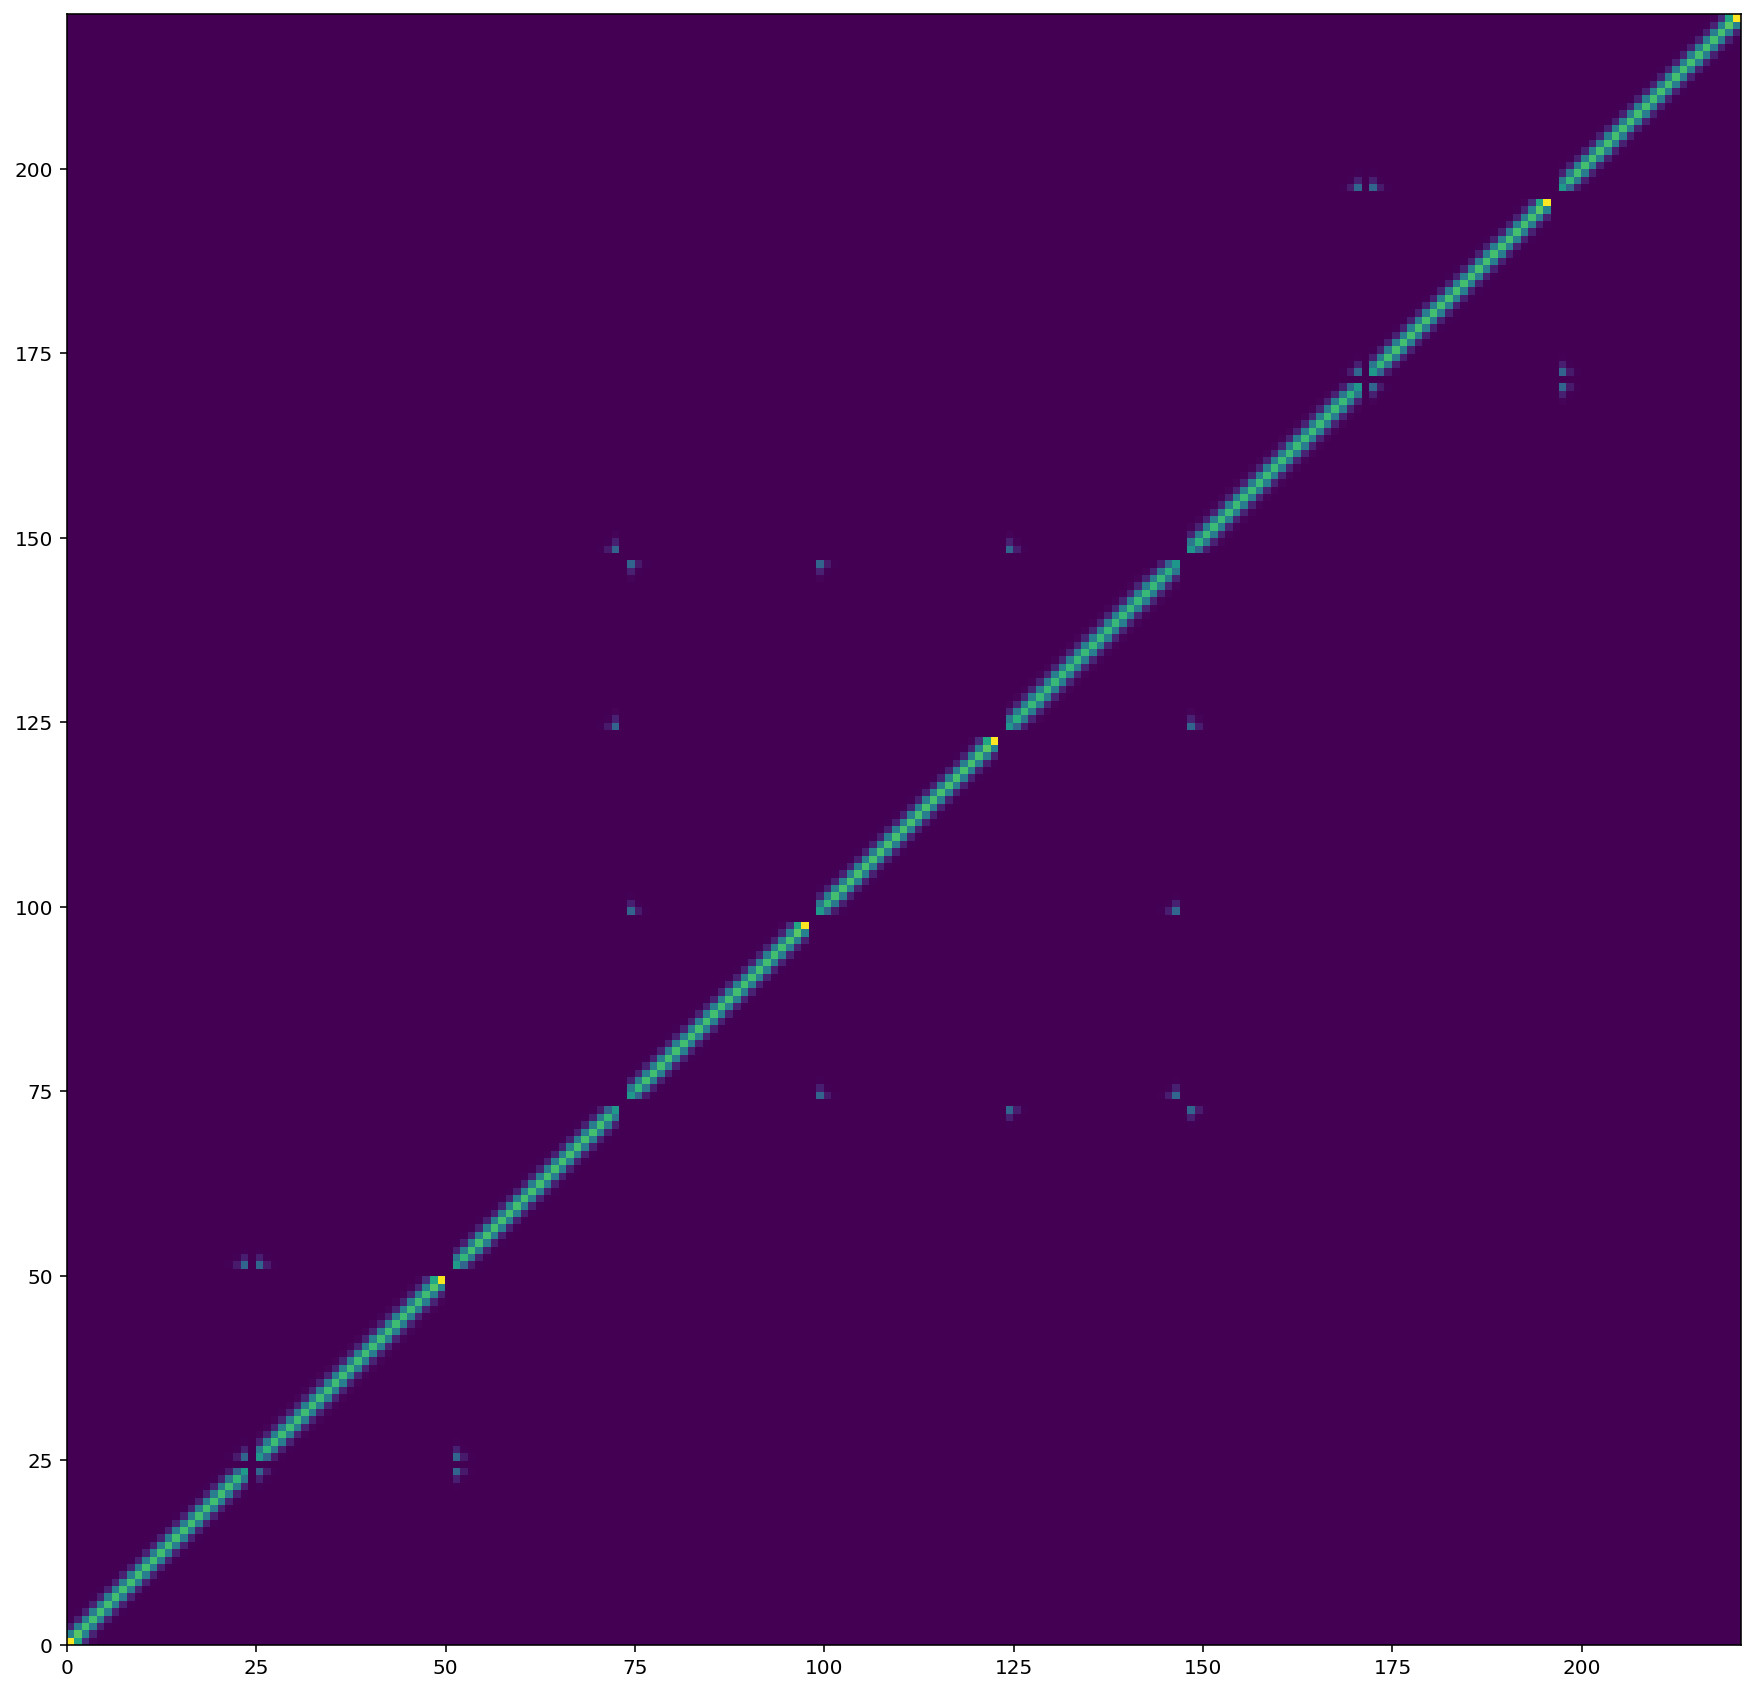

In [86]:
plt.figure(figsize=(15,15))
plt.pcolormesh(decoder.state_transition_)

In [88]:
cv_clusterless_decoder_results

[<xarray.Dataset>
 Dimensions:            (position: 221, time: 131125)
 Coordinates:
   * time               (time) float64 2.36e+03 2.36e+03 ... 2.623e+03 2.623e+03
   * position           (position) float64 1.236 3.707 6.178 ... 640.9 643.4
 Data variables:
     likelihood         (time, position) float64 0.867 0.8373 ... 0.1507 0.1467
     causal_posterior   (time, position) float64 0.01019 0.009843 ... 9.746e-18
     acausal_posterior  (time, position) float64 4.447e-14 ... 9.746e-18,
 <xarray.Dataset>
 Dimensions:            (position: 221, time: 131125)
 Coordinates:
   * time               (time) float64 2.623e+03 2.623e+03 ... 2.885e+03
   * position           (position) float64 1.236 3.707 6.178 ... 640.9 643.4
 Data variables:
     likelihood         (time, position) float64 0.4843 0.464 ... 0.007568
     causal_posterior   (time, position) float64 0.0108 0.01035 ... 2.998e-46
     acausal_posterior  (time, position) float64 1.888e-15 ... 2.998e-46,
 <xarray.Dataset>
 Dimens

In [89]:
cv_clusterless_decoder_results_concat = xr.concat(
    cv_clusterless_decoder_results, dim="time"
)
cv_clusterless_decoder_results_concat

<xarray.Dataset>
Dimensions:            (position: 221, time: 655622)
Coordinates:
  * position           (position) float64 1.236 3.707 6.178 ... 640.9 643.4
  * time               (time) float64 2.36e+03 2.36e+03 ... 3.672e+03 3.672e+03
Data variables:
    likelihood         (time, position) float64 0.867 0.8373 ... 0.8335 0.9051
    causal_posterior   (time, position) float64 0.01019 0.009843 ... 0.3106
    acausal_posterior  (time, position) float64 4.447e-14 5.509e-14 ... 0.3106

In [90]:
results = cv_clusterless_decoder_results_concat

In [91]:
print('results_'+ str(epoch_key[0]) + '_' + str(epoch_key[1]) + '_' + str(epoch_key[2]) + '_' + str(0) + '_' + str(len(cv_clusterless_decoder_results_concat.time)) +
                      '_placebin' + str(decoder.place_bin_size) + 
                      '_speed' + str(decoder.replay_speed) + 
                      '_transit' + str(decoder.transition_type) + 
                      '_encode' + is_training_description + 
                      '_5fold_withEDGE' +
                      '.nc')

results_chimi_5_2_0_655622_placebin2.5_speed1_transitrandom_walk_encoderun4cm_5fold_withEDGE.nc


In [92]:
fpath = '/home/alison/Src/ac_clusterless_decoding/Processed-Data/'
if savedata==1:  
    results.to_netcdf(fpath + 'results_'+ str(epoch_key[0]) + '_' + str(epoch_key[1]) + '_' + str(epoch_key[2]) + '_' + str(0) + '_' + str(len(cv_clusterless_decoder_results_concat.time)) +
                      '_placebin' + str(decoder.place_bin_size) + 
                      '_speed' + str(decoder.replay_speed) + 
                      '_transit' + str(decoder.transition_type) + 
                      '_encode' + is_training_description + 
                      '_5fold_withEDGE' +
                      '.nc', 'w') # will override

In [93]:
savedata

1